In [1]:
import math
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.shape

(7043, 21)

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## drop columns

In [6]:
df.drop(["customerID"],axis=1,inplace=True)

### check for data type using info(

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Check for unique value

In [8]:
pd.DataFrame([df.nunique(),df.dtypes],index=["num_unique","dtypes"])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
num_unique,2,2,2,2,73,2,3,3,3,3,3,3,3,3,3,2,4,1585,6531,2
dtypes,object,int64,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,object,object


## Reprsent one columns as float  

In [9]:
df["TotalCharges"] =pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [10]:
pd.DataFrame([df.nunique(),df.dtypes],index=["num_unique","dtypes"])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
num_unique,2,2,2,2,73,2,3,3,3,3,3,3,3,3,3,2,4,1585,6530,2
dtypes,object,int64,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,object


## Check for null value

In [11]:
null_sum=df.isnull().sum()
null_ratio=df.isnull().sum()/df.shape[0]
pd.DataFrame([null_sum,null_ratio],index=["Null_sum","Null_ratio"])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Null_sum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.000000,0.0
Null_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001562,0.0


## drop null value 

In [12]:
df=df.dropna(subset=['TotalCharges'])

In [13]:
null_sum=df.isnull().sum()
null_ratio=df.isnull().sum()/df.shape[0]
pd.DataFrame([null_sum,null_ratio],index=["Null_sum","Null_ratio"])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Null_sum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Null_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Reprsent some columns as categorical

In [20]:
cols="gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn".split()
df[cols]=df[cols].astype("category")
# df.info()

## check for duplicat

In [15]:
df.duplicated().sum()

22

In [16]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### Statistics adout data

In [17]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7010.000000,7010.000000,7010.000000
mean,32.520399,64.888666,2290.353388
std,24.520441,30.064769,2266.820832
min,1.000000,18.250000,18.800000
25%,9.000000,35.750000,408.312500
50%,29.000000,70.400000,1403.875000
75%,56.000000,89.900000,3807.837500
max,72.000000,118.750000,8684.800000


In [18]:
df.describe(include="category")

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3535,5869,3617,4911,6330,3363,3090,3489,3079,3086,3464,2801,2773,3853,4158,2359,5153


In [29]:
print(sum(df.Churn== "No"))
print(sum(df.Churn== "Yes"))

5153
1857


## Visualization

In [23]:
numeric_df=df.select_dtypes("number")
# numeric_df

In [25]:
categorical_df=df.select_dtypes("category")
# categorical_df

## Check for outliers

<function matplotlib.pyplot.show(close=None, block=None)>

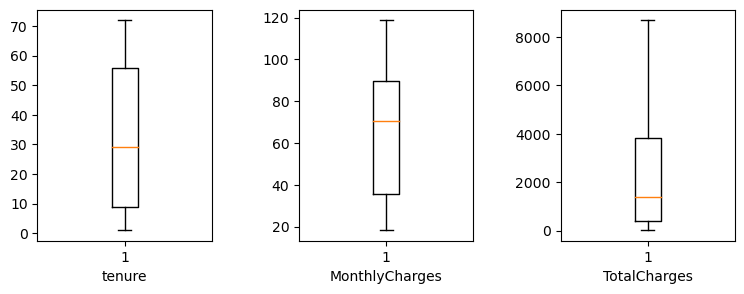

In [33]:
plt.figure(figsize=(9,3))
for i,col in enumerate(numeric_df):
    plt.subplot(1,3,i+1)
    plt.boxplot(df[col])
    plt.xlabel(col)
plt.subplots_adjust(wspace=.5,hspace=.5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

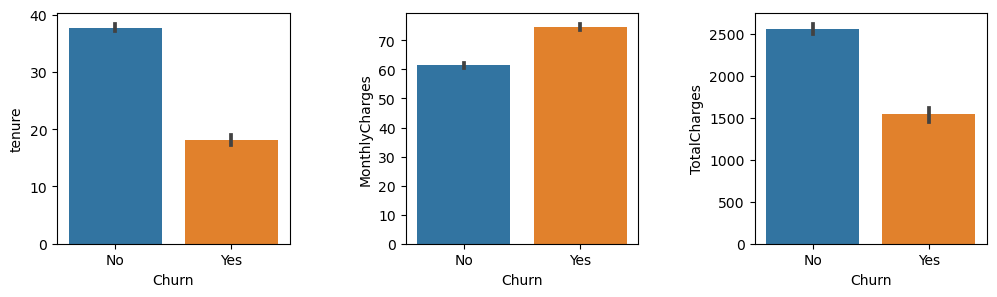

In [37]:
plt.figure(figsize=(12,3))
for i,col in enumerate(numeric_df):
    plt.subplot(1,3,i+1)
    sns.barplot(x=df["Churn"],y=df[col])
    plt.xlabel("Churn")
    plt.ylabel(col)
plt.subplots_adjust(wspace=.5,hspace=.5)
plt.show

gender & Churn


gender,Female,Male
Churn,,
No,2541,2612
Yes,934,923


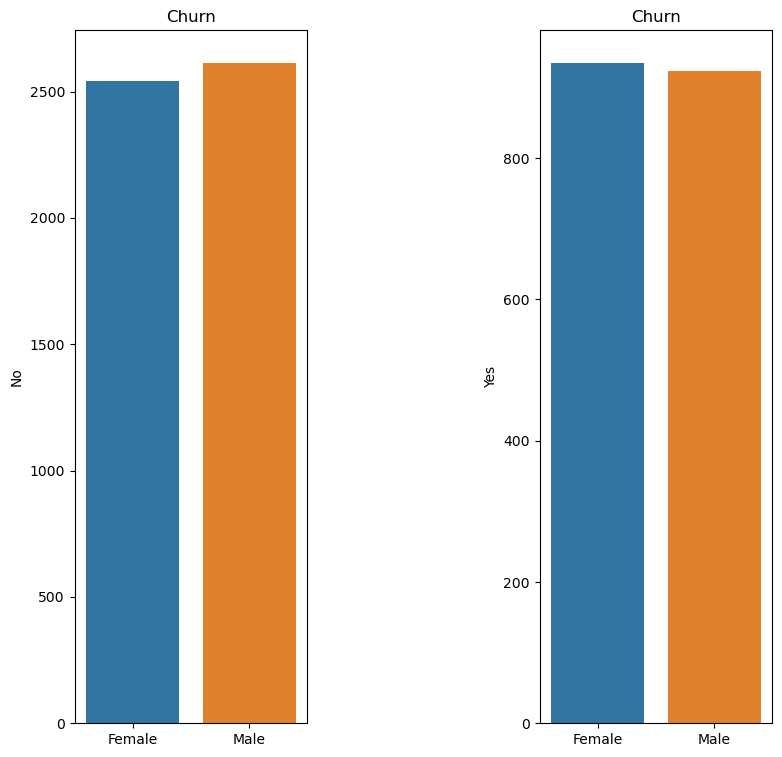

SeniorCitizen & Churn


SeniorCitizen,0,1
Churn,,
No,4487,666
Yes,1382,475


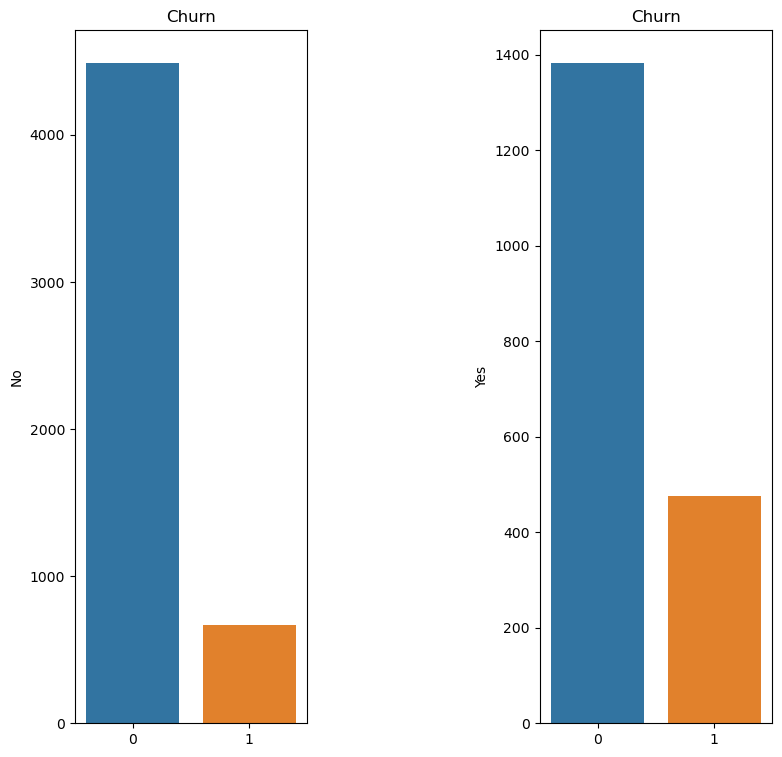

Partner & Churn


Partner,No,Yes
Churn,,
No,2429,2724
Yes,1188,669


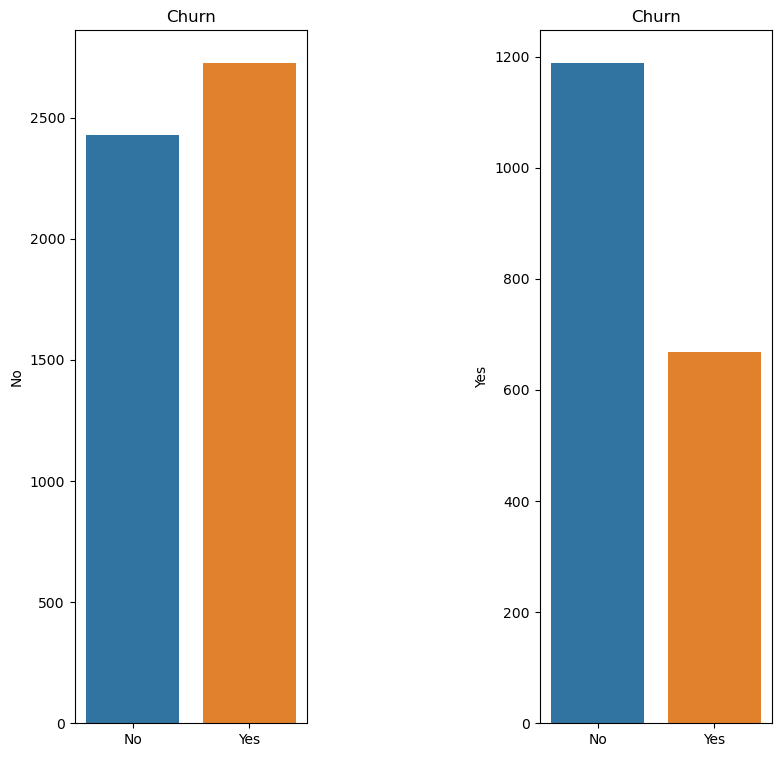

Dependents & Churn


Dependents,No,Yes
Churn,,
No,3380,1773
Yes,1531,326


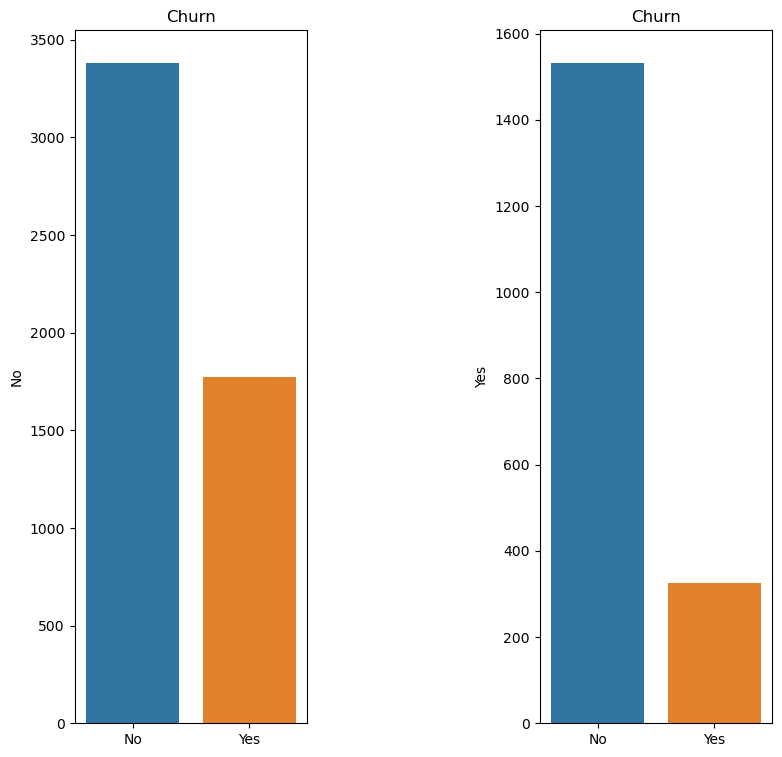

PhoneService & Churn


PhoneService,No,Yes
Churn,,
No,510,4643
Yes,170,1687


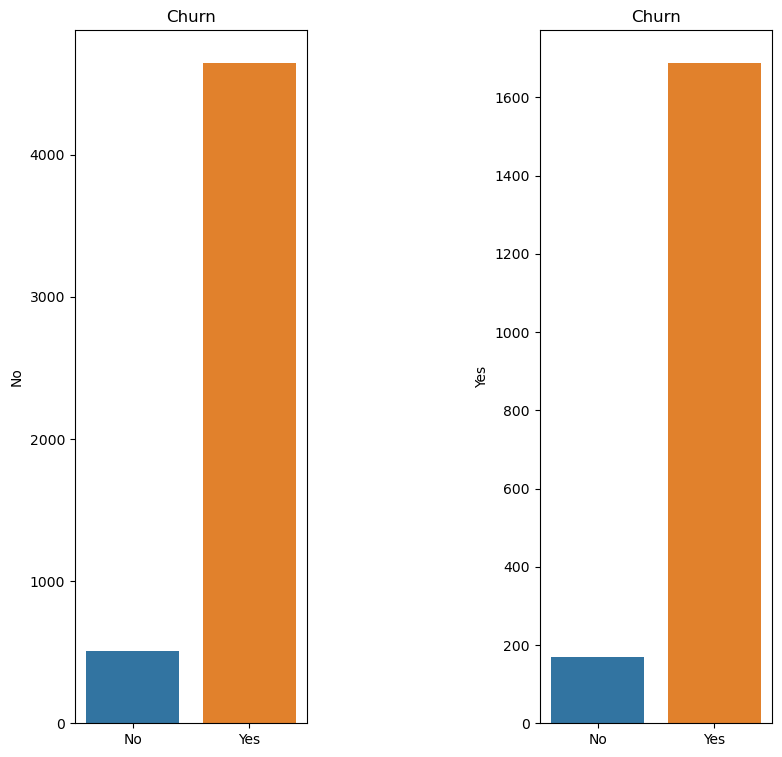

MultipleLines & Churn


MultipleLines,No,No phone service,Yes
Churn,,,
No,2526,510,2117
Yes,837,170,850


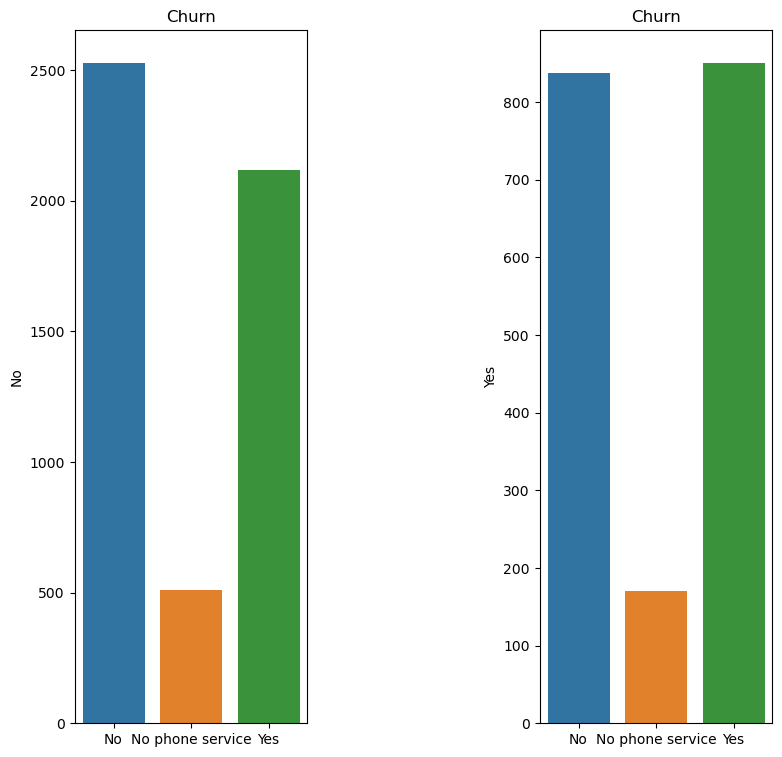

InternetService & Churn


InternetService,DSL,Fiber optic,No
Churn,,,
No,1957,1799,1397
Yes,457,1291,109


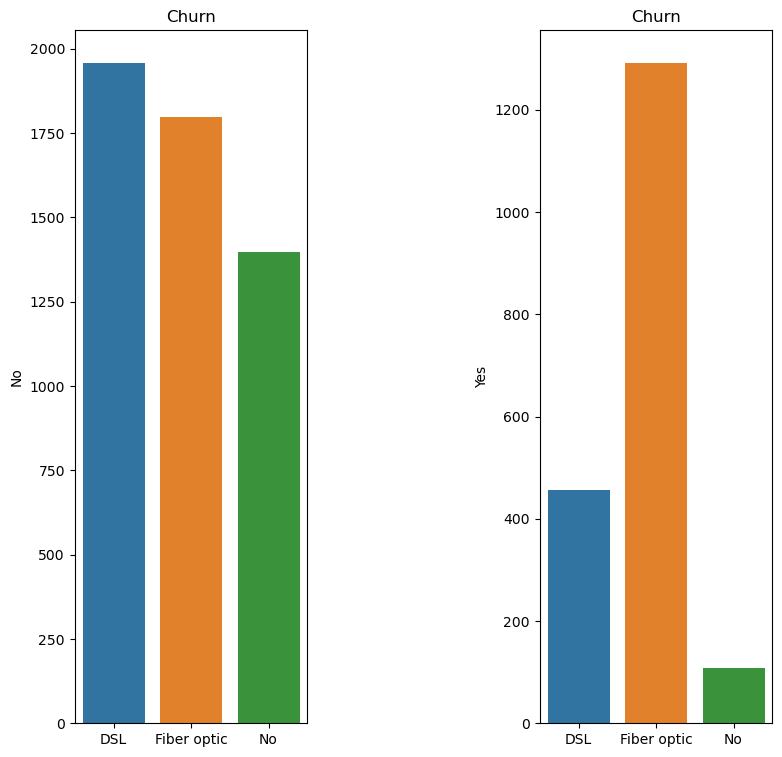

OnlineSecurity & Churn


OnlineSecurity,No,No internet service,Yes
Churn,,,
No,2036,1397,1720
Yes,1453,109,295


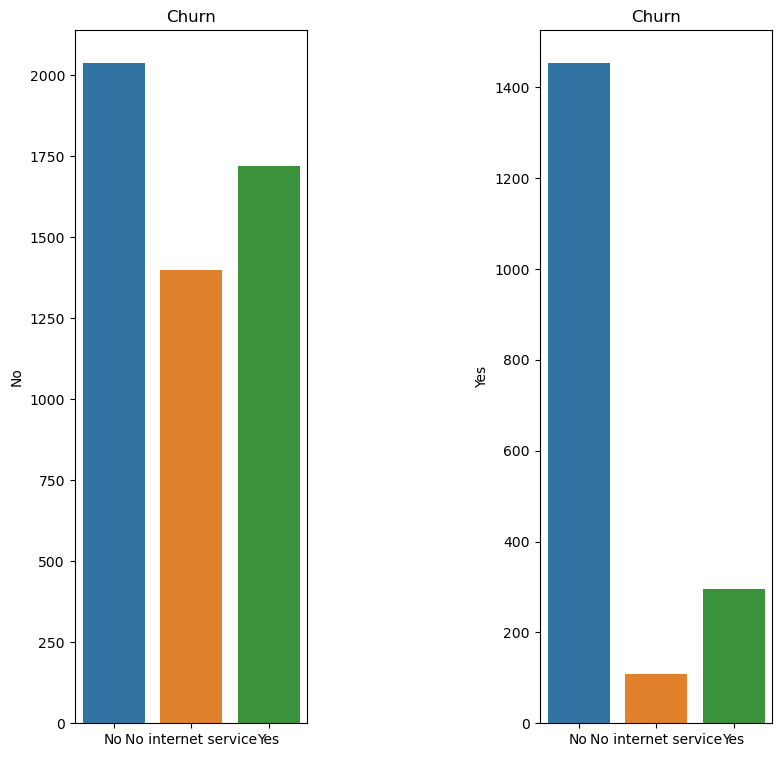

OnlineBackup & Churn


OnlineBackup,No,No internet service,Yes
Churn,,,
No,1854,1397,1902
Yes,1225,109,523


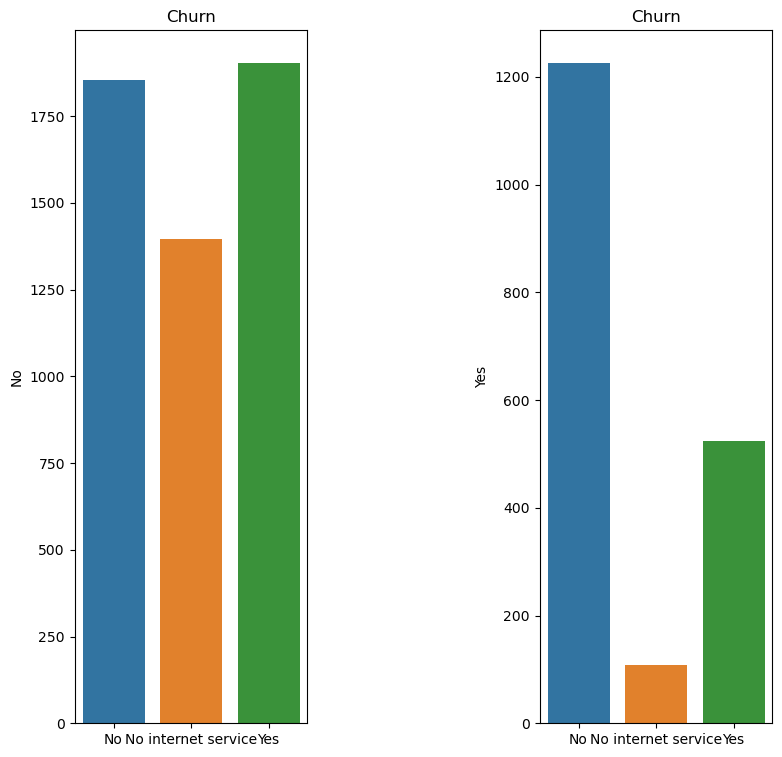

DeviceProtection & Churn


DeviceProtection,No,No internet service,Yes
Churn,,,
No,1883,1397,1873
Yes,1203,109,545


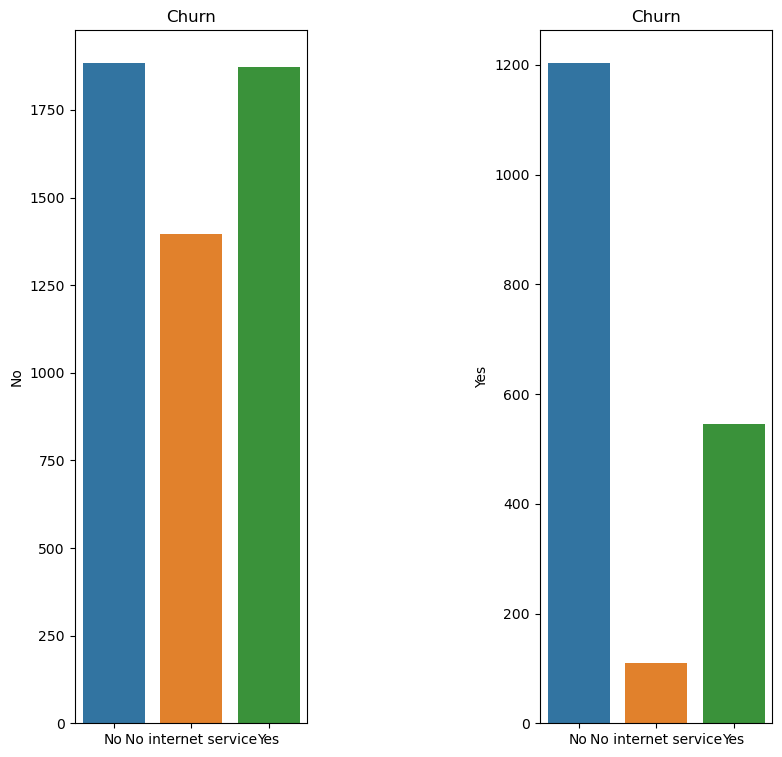

TechSupport & Churn


TechSupport,No,No internet service,Yes
Churn,,,
No,2026,1397,1730
Yes,1438,109,310


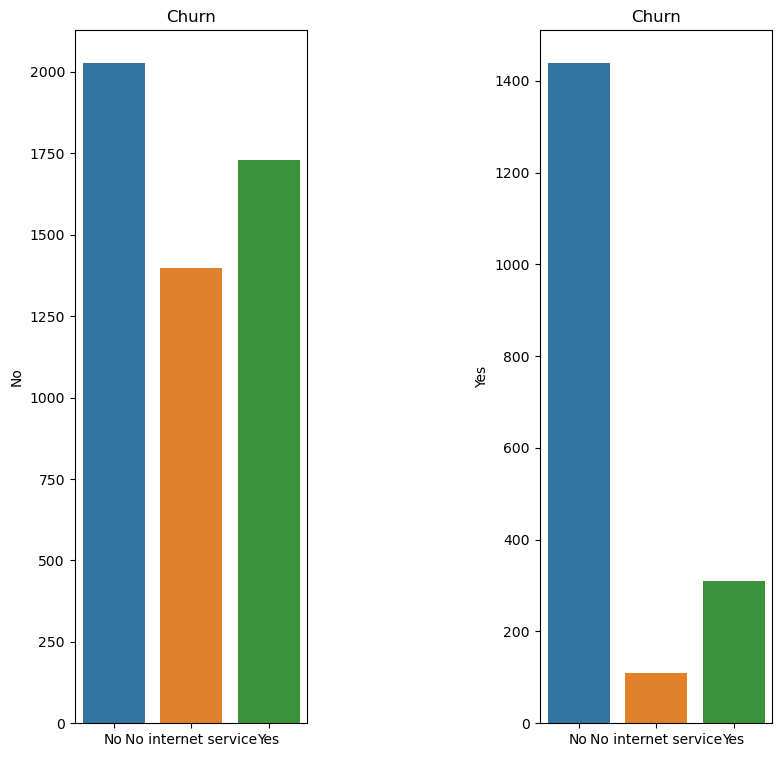

StreamingTV & Churn


StreamingTV,No,No internet service,Yes
Churn,,,
No,1867,1397,1889
Yes,934,109,814


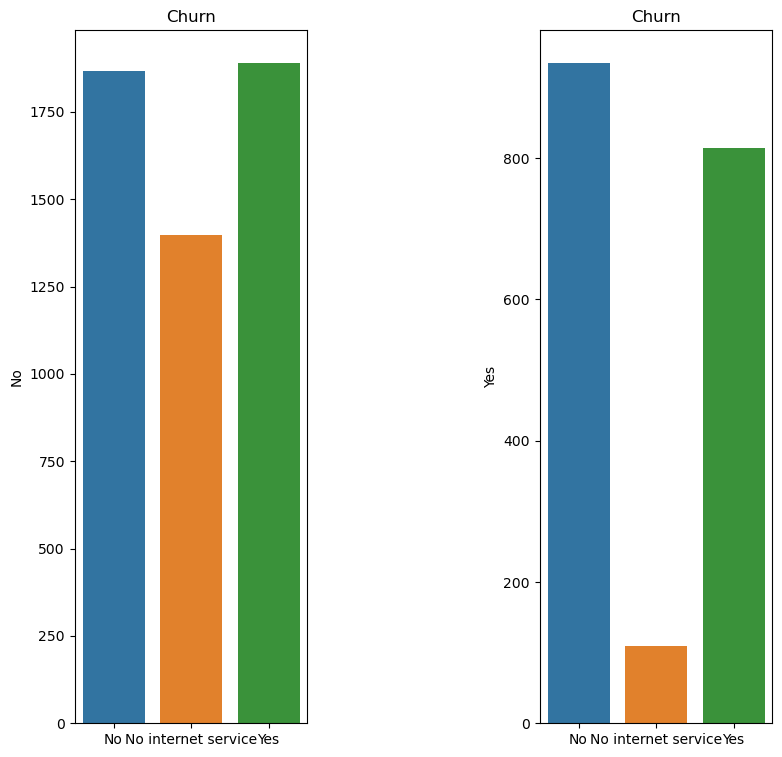

StreamingMovies & Churn


StreamingMovies,No,No internet service,Yes
Churn,,,
No,1843,1397,1913
Yes,930,109,818


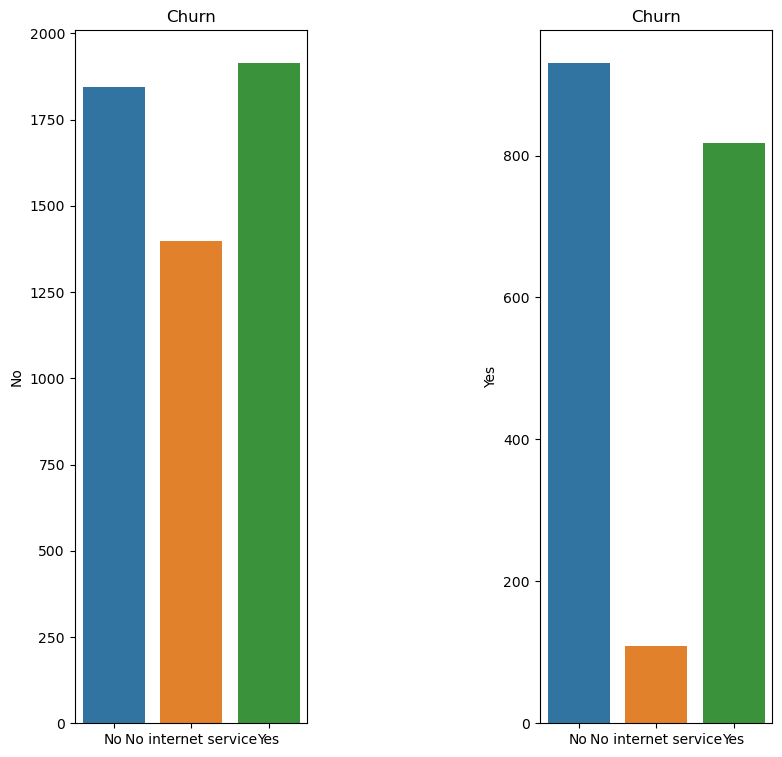

Contract & Churn


Contract,Month-to-month,One year,Two year
Churn,,,
No,2210,1306,1637
Yes,1643,166,48


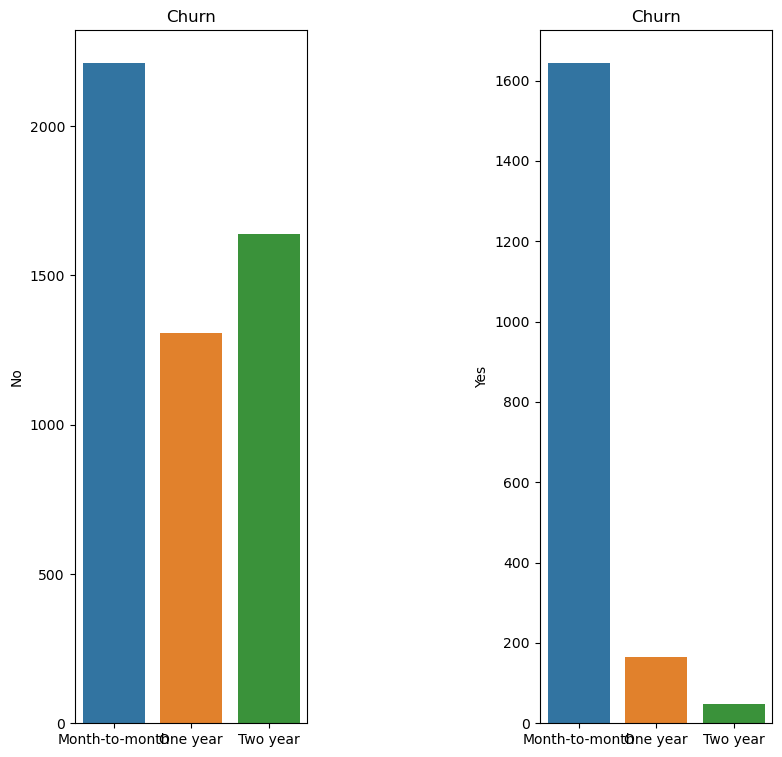

PaperlessBilling & Churn


PaperlessBilling,No,Yes
Churn,,
No,2386,2767
Yes,466,1391


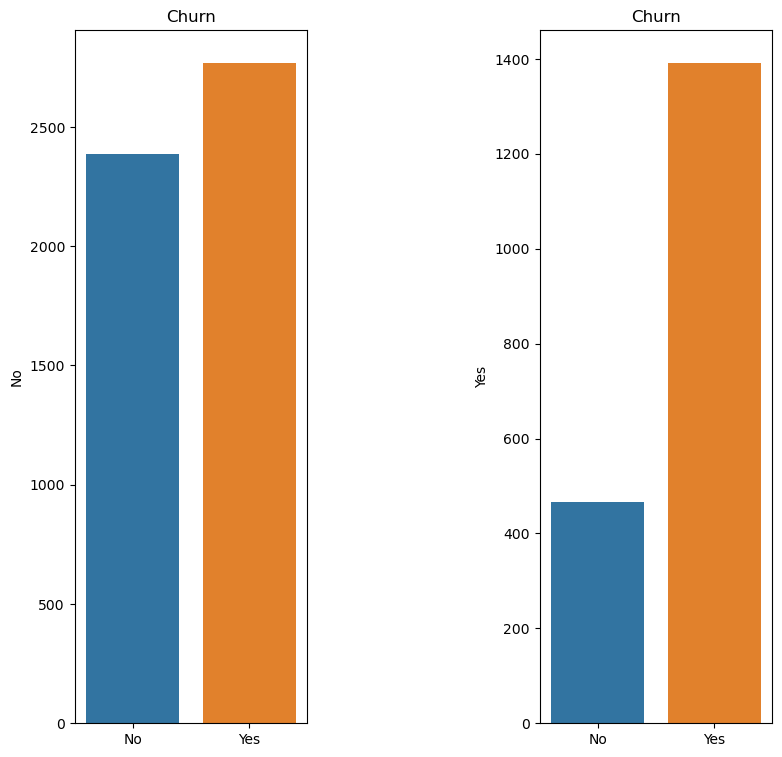

PaymentMethod & Churn


PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Churn,,,,
No,1284,1289,1294,1286
Yes,258,232,1065,302


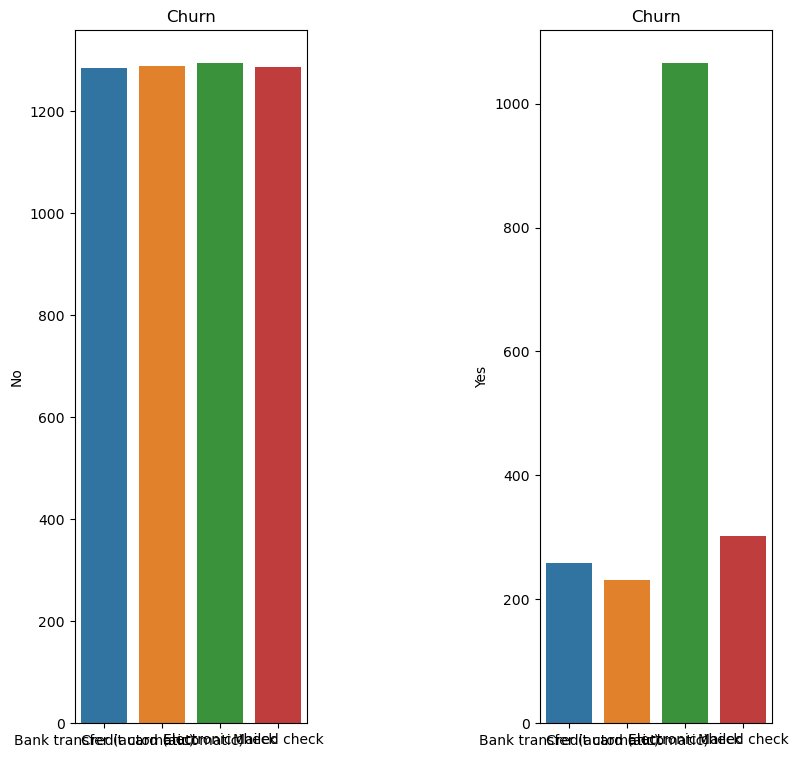

In [39]:
for col in categorical_df.columns[:-1]:
    print(f"{col} & Churn")
    agg = df.pivot_table(index="Churn", columns=col, values="tenure", aggfunc=len)
   
    Churn_yes = agg.iloc[0]
    Churn_no = agg.iloc[1]
    categ = agg.columns.tolist()
    
    display(agg)
    plt.figure(figsize=(9, 9))
    
    plt.subplot(1, 2, 1)
    plt.title("Churn")
    sns.barplot(x=categ, y=Churn_yes)

    plt.subplot(1, 2, 2)
    plt.title("Churn")
    sns.barplot(x=categ, y=Churn_no)
    
    
    plt.subplots_adjust(hspace=1, wspace=1)
    plt.show()
    print("===============================")

# split data

In [40]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=19)

## Normalization

In [41]:
from sklearn.preprocessing import MinMaxScaler
numeric_cols=x_train.select_dtypes("number").columns
x_scaler=MinMaxScaler()

x_train[numeric_cols]=x_scaler.fit_transform(x_train[numeric_cols])

x_test[numeric_cols]=x_scaler.transform(x_test[numeric_cols])

## Encoding

In [44]:
# one hot encoding
y_train=pd.get_dummies(y_train,columns=["Churn"])
y_test=pd.get_dummies(y_test,columns=["Churn"])

x_train=pd.get_dummies(x_train,columns=["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"])
x_test=pd.get_dummies(x_test,columns=["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"])

# ML using SVM

In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [57]:
from sklearn.metrics import accuracy_score

tr_pred = knn_model.predict(x_train)
ts_pred = knn_model.predict(x_test)

tr_acc = accuracy_score(y_train, tr_pred)
ts_acc = accuracy_score(y_test, ts_pred)

print(tr_acc)
print(ts_acc)

0.8585693906663949
0.7375178316690443


In [58]:
n_neighbors=np.arange(2,15)
tr_errors = []
ts_errors = []
for k in n_neighbors:
    from sklearn.neighbors import KNeighborsClassifier

    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train)
    
    from sklearn.metrics import accuracy_score

    tr_pred = knn_model.predict(x_train)
    ts_pred = knn_model.predict(x_test)

    tr_acc = accuracy_score(y_train, tr_pred)
    ts_acc = accuracy_score(y_test, ts_pred)
    
    tr_errors.append(tr_acc)
    ts_errors.append(ts_acc)

print(tr_errors)
print(ts_errors)
    

[0.7210108008966782, 0.8585693906663949, 0.741593641736295, 0.8388017118402282, 0.7617689015691869, 0.8261667006317506, 0.7701243122070511, 0.8241287955981251, 0.7768493988180151, 0.8141430609333605, 0.7803138373751783, 0.8119013653963725, 0.7752190747911147]
[0.5639562529719448, 0.7375178316690443, 0.6452686638135996, 0.7570137898240609, 0.6937708036138849, 0.7503566333808844, 0.7094626723728008, 0.7570137898240609, 0.7180218735140276, 0.760342368045649, 0.7299096528768426, 0.7617689015691869, 0.7322872087494056]
